<a href="https://colab.research.google.com/github/nishantkr2003/Cat-vs-Dog/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello world!")

Hello world!


In [2]:
!pip install opendatasets


In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nishantkumar2003
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:27<00:00, 41.6MB/s]


In [ ]:
#import zipfile
#zip_ref = zipfile.ZipFile("/content/dogs-vs-cats",'r')
#zip_ref.extractall('./content')
#zip_ref.close()
#nishantkumar2003
#77e082ac3a6e8f492b10cfff37b4b2d2

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generator

train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs-vs-cats/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),

)

Found 20000 files belonging to 2 classes.


In [6]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs-vs-cats/test",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),

)

Found 5000 files belonging to 2 classes.


In [7]:
# stored in the form of numpy array b/w 0 and 255


def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [8]:
# create model

model = Sequential()

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu',input_shape=[256,256,3]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2,padding='valid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2,padding='valid'))


In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2,padding='valid'))


In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.5723 - loss: 2.1210 - val_accuracy: 0.6508 - val_loss: 0.6100
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7043 - loss: 0.5725 - val_accuracy: 0.6952 - val_loss: 0.5680
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7560 - loss: 0.5021 - val_accuracy: 0.7646 - val_loss: 0.4882
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8011 - loss: 0.4304 - val_accuracy: 0.7518 - val_loss: 0.5507
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8357 - loss: 0.3663 - val_accuracy: 0.7200 - val_loss: 0.6895


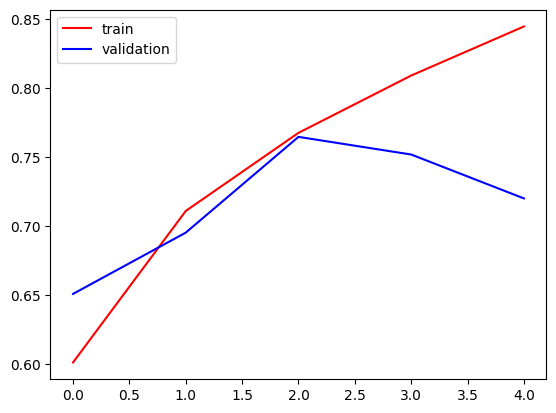

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

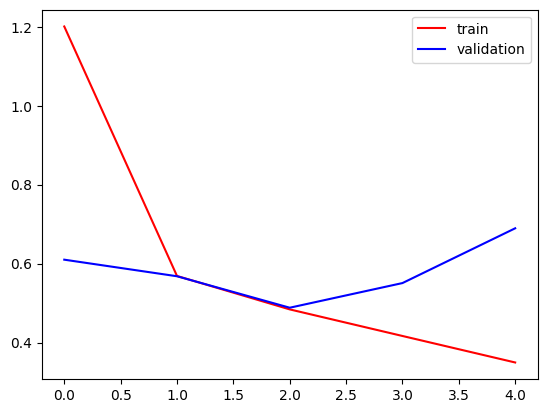

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

In [21]:
test_image1 = cv2.imread("/content/pexels-chevanon-1108099.jpg")

In [22]:
test_image2 = cv2.imread("/content/pexels-pixabay-45201.jpg")

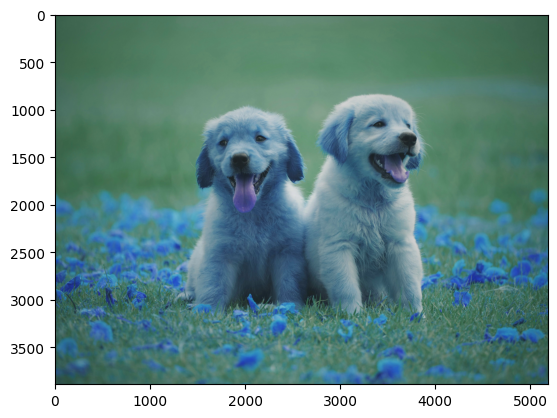

In [23]:
plt.imshow(test_image1)

In [24]:
test_image1.shape

(3888, 5184, 3)

In [25]:
test_image1 = cv2.resize(test_image1,(256,256))

In [26]:
test_input1 = test_image1.reshape((1,256,256,3))
# Use NumPy's reshape on test_image1 instead of cv2

In [27]:
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[1.]], dtype=float32)

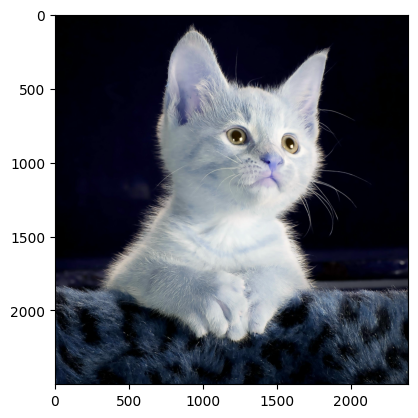

In [28]:
plt.imshow(test_image2)
test_image2 = cv2.resize(test_image2,(256,256))
test_input2 = test_image2.reshape((1,256,256,3))
model.predict(test_input2)